#                                           ML Project


# MODULE 1: IMPORTS

In [1]:
# lib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn. tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn. ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn. naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
sns.set_palette(['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])

print("All libraries imported successfully!")

All libraries imported successfully!


# MODULE 2: DATA LOADING & EXPLORATION

In [8]:


df = pd.read_csv("collecteddata.csv", encoding="latin1")

df.columns = [
    'timestamp', 'username', 'age_group', 'gender',
    'financial_background_old', 'occupation',
    'sleep_hours', 'screen_time', 'free_time_activities',
    'exercise_frequency', 'stress_level', 'mental_health_experiences',
    'main_reason', 'anxiety_frequency', 'has_support',
    'emotional_state', 'preferred_resources', 'awareness_needed', 'financial_background'
]

print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")


# Missing values
missing_count = df.isnull().sum().sum()
print(f"\nTotal missing values: {missing_count}")
if missing_count > 0:
    print("\nColumns with missing values:")
    missing_cols = df.isnull().sum()
    for col, count in missing_cols[missing_cols > 0].items():
        print(f"  - {col}: {count} ({count/len(df)*100:.2f}%)")

# Duplicates
dup_count = df.duplicated().sum()
print(f"\nDuplicate rows: {dup_count}")


print(f"\nTotal columns: {len(df.columns)}")
print("\nColumn names and types:")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i: 2d}. {col:30s} - {dtype}")


print(df.head())


print("\n1. Age Group Distribution:")
print(df['age_group'].value_counts())

print("\n2. Gender Distribution:")
print(df['gender'].value_counts())

print("\n3.  Occupation Distribution:")
print(df['occupation'].value_counts())

print("\n4. Stress Level Distribution:")
print(df['stress_level'].value_counts().sort_index())

print("\n5. Financial Background Distribution:")
print(df['financial_background'].value_counts())


print("\nSleep Hours:")
print(f"  Sample values: {df['sleep_hours']. head(10).tolist()}")
print(f"  Data type: {df['sleep_hours'].dtype}")

print("\nScreen Time:")
print(f"  Sample values: {df['screen_time'].head(10).tolist()}")
print(f"  Data type: {df['screen_time'].dtype}")



Dataset Shape: 600 rows × 19 columns

Total missing values: 641

Columns with missing values:
  - username: 489 (81.50%)
  - financial_background_old: 16 (2.67%)
  - financial_background: 136 (22.67%)

Duplicate rows: 0

Total columns: 19

Column names and types:
 1. timestamp                      - object
 2. username                       - object
 3. age_group                      - object
 4. gender                         - object
 5. financial_background_old       - object
 6. occupation                     - object
 7. sleep_hours                    - object
 8. screen_time                    - object
 9. free_time_activities           - object
 10. exercise_frequency             - object
 11. stress_level                   - object
 12. mental_health_experiences      - object
 13. main_reason                    - object
 14. anxiety_frequency              - object
 15. has_support                    - object
 16. emotional_state                - object
 17. preferred_resources

# MODULE 3: DATA CLEANING

In [11]:

print(" Handling Duplicate Columns")

if 'financial_background_old' in df.columns:
    print("Found duplicate 'financial_background' columns.  Merging...")
    df['financial_background'] = df['financial_background_old'].fillna(df['financial_background'])
    df.drop('financial_background_old', axis=1, inplace=True)
    print("✓ Merged financial_background_old into financial_background")
else:
    print("No duplicate columns found")

print("\n--- Step 2: Removing Unnecessary Columns ---")

columns_to_drop = ['username', 'timestamp']
existing_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_to_drop:
    print(f"Dropping columns: {existing_to_drop}")
    df.drop(existing_to_drop, axis=1, inplace=True)
    print(f" Removed {len(existing_to_drop)} columns")
else:
    print("No columns to drop")

print(f"Remaining columns: {len(df.columns)}")


# Clean age_group
print("\nCleaning 'age_group' column...")
print(f"  Before: {df['age_group']. unique()[:3]}")
df['age_group'] = df['age_group'].str.replace('–', '-').str.replace('\x96', '-').str.strip()
print(f"  After:   {df['age_group']. unique()[:3]}")
print("Standardized age group format")

# Clean exercise_frequency
print("\nCleaning 'exercise_frequency' column...")
print(f"  Before: {df['exercise_frequency'].unique()[:3]}")
df['exercise_frequency'] = df['exercise_frequency'].str.replace('–', '-').str.replace('\x96', '-').str.strip()
print(f"  After:  {df['exercise_frequency'].unique()[:3]}")



def parse_hours(val):
    val = str(val).lower().replace('hours', '').replace('hrs', '').replace('hr', '').strip()
    if 'to' in val or '-' in val:
        nums = [float(x) for x in val.replace('to', '-').split('-') if x.strip().replace('.', '').isdigit()]
        return round(np.mean(nums), 1) if nums else 7.0
    return float(val) if val.replace('.', '').isdigit() else 7.0

# Clean sleep_hours

print(f"  Sample before: {df['sleep_hours']. head(3).tolist()}")
print(f"  Data type before: {df['sleep_hours']. dtype}")
df['sleep_hours'] = df['sleep_hours']. apply(parse_hours)
print(f"  Sample after: {df['sleep_hours'].head(3).tolist()}")
print(f"  Data type after:  {df['sleep_hours'].dtype}")
print(f"  ✓ Converted to numeric (Mean: {df['sleep_hours']. mean():.2f} hours)")

# Clean screen_time

print(f"  Sample before:  {df['screen_time'].head(3).tolist()}")
print(f"  Data type before: {df['screen_time']. dtype}")
df['screen_time'] = df['screen_time']. apply(lambda x: parse_hours(str(x).replace('_', '-').replace('approx', '')))
print(f"  Sample after:  {df['screen_time'].head(3).tolist()}")
print(f"  Data type after: {df['screen_time']. dtype}")
print(f"  Converted to numeric (Mean: {df['screen_time'].mean():.2f} hours)")



print("\nMissing values before filling:")
missing_before = df.isnull().sum()
missing_before = missing_before[missing_before > 0]
if not missing_before.empty:
    for col, count in missing_before.items():
        print(f"  - {col}: {count} ({count/len(df)*100:.2f}%)")
else:
    print("  No missing values found")

# Fill financial_background
if df['financial_background'].isnull().sum() > 0:
    mode_value = df['financial_background'].mode()[0]
    missing_count = df['financial_background'].isnull().sum()
    print(f"\nFilling {missing_count} missing 'financial_background' values with mode:  '{mode_value}'")
    df['financial_background']. fillna(mode_value, inplace=True)




print(f"\nFinal dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

print("\nData types summary:")
print(df.dtypes. value_counts())

print("\nNumeric columns statistics:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(df[numeric_cols].describe())



 Handling Duplicate Columns
Found duplicate 'financial_background' columns.  Merging...
✓ Merged financial_background_old into financial_background

--- Step 2: Removing Unnecessary Columns ---
Dropping columns: ['username', 'timestamp']
 Removed 2 columns
Remaining columns: 16

Cleaning 'age_group' column...
  Before: ['19\x9622 years' '23\x9626 years' '15\x9618 years']
  After:   ['19-22 years' '23-26 years' '15-18 years']
Standardized age group format

Cleaning 'exercise_frequency' column...
  Before: ['1\x962 times a week' '3\x965 times a week' 'Never']
  After:  ['1-2 times a week' '3-5 times a week' 'Never']
  Sample before: ['7', '8', '9']
  Data type before: object
  Sample after: [7.0, 8.0, 9.0]
  Data type after:  float64
  ✓ Converted to numeric (Mean: 7.01 hours)
  Sample before:  ['3', '5', '4']
  Data type before: object
  Sample after:  [3.0, 5.0, 4.0]
  Data type after: float64
  Converted to numeric (Mean: 6.67 hours)

Missing values before filling:
  No missing values

# MODULE 4: EXPLORATORY DATA ANALYSIS

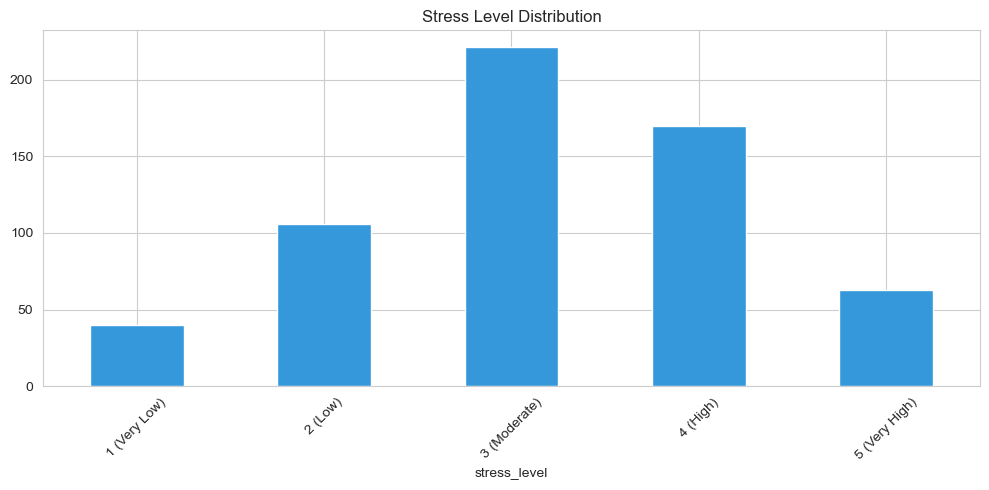

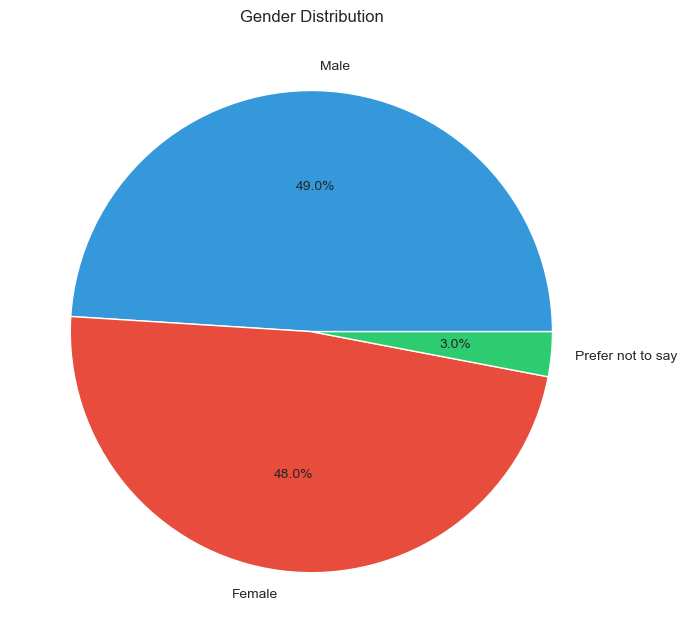

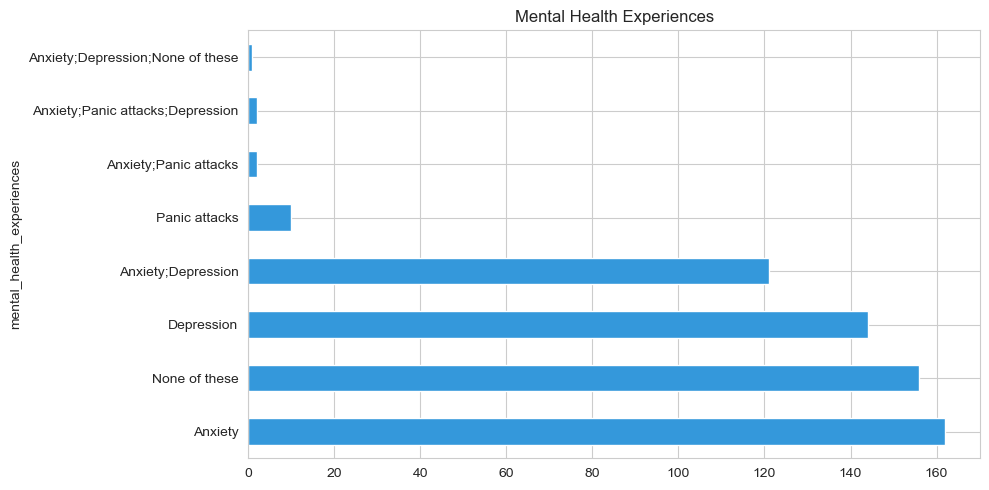

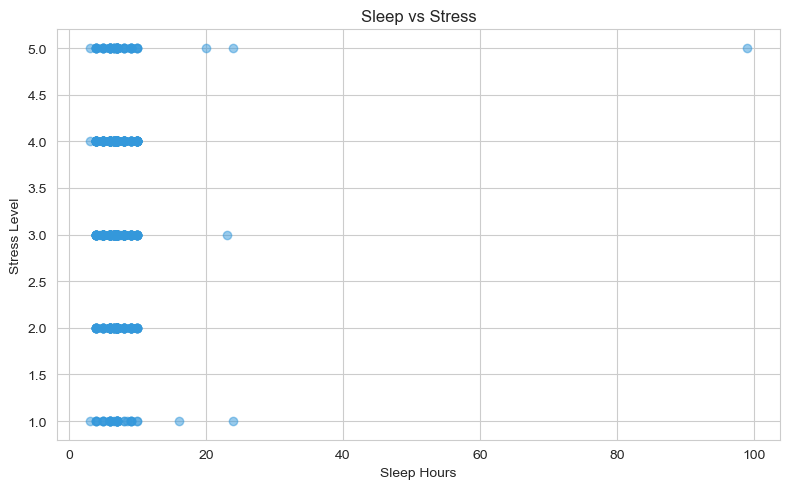

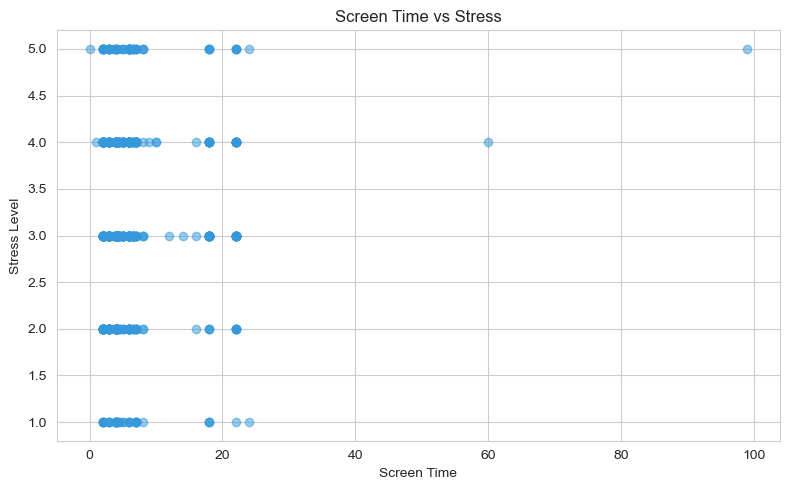

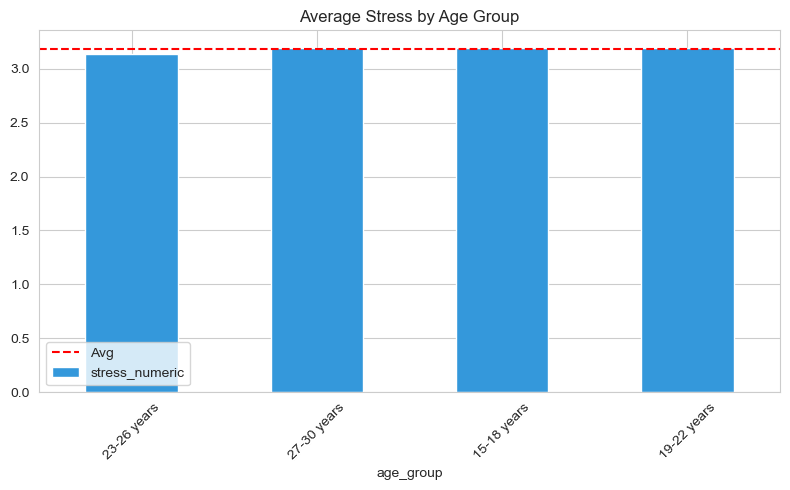

Sleep-Stress correlation: 0.058
Screen-Stress correlation: 0.087


In [14]:
df['stress_numeric'] = df['stress_level'].str.extract(r'(\d+)').astype(int)

# Plot 1: Stress distribution
plt.figure(figsize=(10, 5))
df['stress_level']. value_counts().sort_index().plot(kind='bar')
plt.title('Stress Level Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Gender pie
plt.figure(figsize=(7, 7))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Plot 3: Mental health experiences
plt.figure(figsize=(10, 5))
df['mental_health_experiences']. value_counts().head(8).plot(kind='barh')
plt.title('Mental Health Experiences')
plt.tight_layout()
plt.show()

# Plot 4: Sleep vs Stress
plt.figure(figsize=(8, 5))
plt.scatter(df['sleep_hours'], df['stress_numeric'], alpha=0.5)
plt.xlabel('Sleep Hours')
plt.ylabel('Stress Level')
plt.title('Sleep vs Stress')
plt.tight_layout()
plt.show()

# Plot 5: Screen time vs Stress
plt.figure(figsize=(8, 5))
plt.scatter(df['screen_time'], df['stress_numeric'], alpha=0.5)
plt.xlabel('Screen Time')
plt.ylabel('Stress Level')
plt.title('Screen Time vs Stress')
plt.tight_layout()
plt.show()

# Plot 6: Stress by age group
plt.figure(figsize=(8, 5))
df.groupby('age_group')['stress_numeric'].mean().sort_values().plot(kind='bar')
plt.title('Average Stress by Age Group')
plt.xticks(rotation=45)
plt.axhline(df['stress_numeric'].mean(), color='red', linestyle='--', label='Avg')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Sleep-Stress correlation: {df['sleep_hours']. corr(df['stress_numeric']):.3f}")
print(f"Screen-Stress correlation: {df['screen_time']. corr(df['stress_numeric']):.3f}")

# MODULE 5: OUTLIER REMOVAL

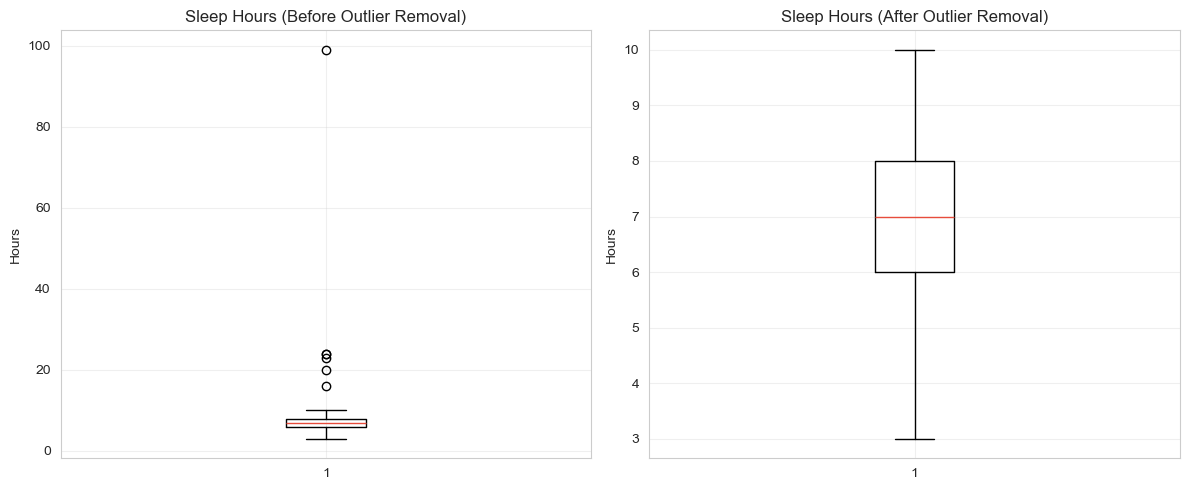

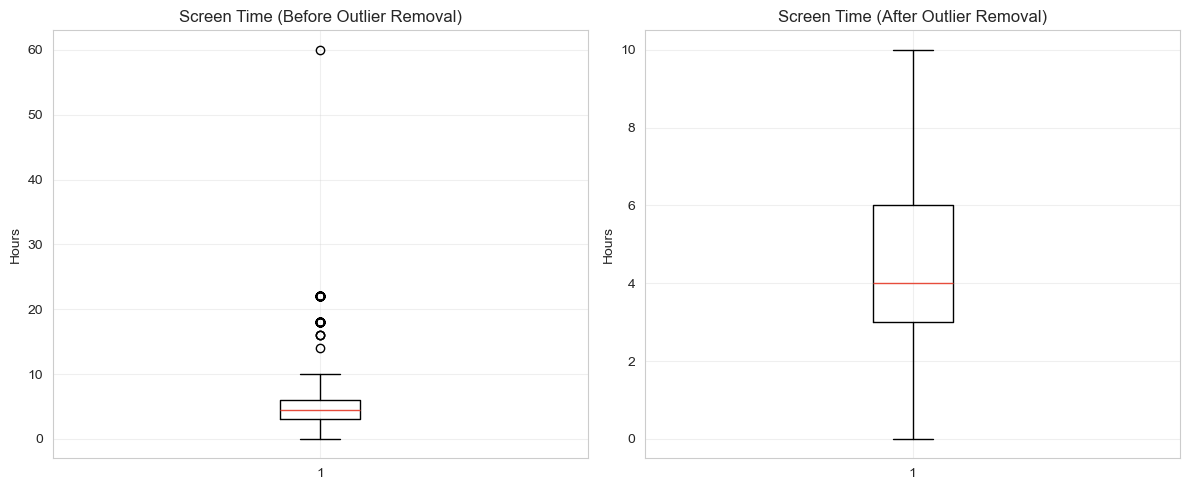

In [17]:
Q1 = df['sleep_hours'].quantile(0.25)
Q3 = df['sleep_hours'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[
    (df['sleep_hours'] >= lower_bound) &
    (df['sleep_hours'] <= upper_bound)
]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(df['sleep_hours'])
axes[0].set_title('Sleep Hours (Before Outlier Removal)')
axes[0].set_ylabel('Hours')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df_clean['sleep_hours'])
axes[1].set_title('Sleep Hours (After Outlier Removal)')
axes[1].set_ylabel('Hours')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Q1 = df_clean['screen_time'].quantile(0.25)
Q3 = df_clean['screen_time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_final = df_clean[
    (df_clean['screen_time'] >= lower_bound) &
    (df_clean['screen_time'] <= upper_bound)
]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(df_clean['screen_time'])
axes[0].set_title('Screen Time (Before Outlier Removal)')
axes[0].set_ylabel('Hours')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df_final['screen_time'])
axes[1].set_title('Screen Time (After Outlier Removal)')
axes[1].set_ylabel('Hours')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

df = df_final.copy()


# MODULE 6: PREPROCESSING

In [20]:
# Binary features
df['has_anxiety'] = df['mental_health_experiences'].str.contains('Anxiety', na=False).astype(int)
df['has_depression'] = df['mental_health_experiences'].str.contains('Depression', na=False).astype(int)
df['has_mental_issue'] = ((df['has_anxiety'] == 1) | (df['has_depression'] == 1)).astype(int)
df['high_stress'] = (df['stress_numeric'] >= 4).astype(int)

# Label encoding
categorical_cols = ['age_group', 'gender', 'financial_background', 'occupation', 
                    'exercise_frequency', 'anxiety_frequency', 'emotional_state']

for col in categorical_cols:  
    df[f'{col}_encoded'] = LabelEncoder().fit_transform(df[col]. astype(str))


# MODULE 7: MACHINE LEARNING 

INSIGHT 1: Understanding Stress Levels Among Students
How demographic and lifestyle factors predict stress levels (1-5 scale)

Model Performance Comparison:
               Model       MAE      RMSE        R2
0  Linear Regression  0.788197  1.006579 -0.016585
1      Decision Tree  1.206731  1.500801 -1.259926
2      Random Forest  0.878322  1.094657 -0.202275

Best Performing Model: Linear Regression

INSIGHT 2: Identifying Mental Health Risk Factors
Predicting likelihood of anxiety or depression based on lifestyle patterns

Model Performance Comparison:
                    Model  Accuracy  Precision    Recall        F1
0     Logistic Regression  0.663462   0.440181  0.663462  0.529235
1             Naive Bayes  0.663462   0.440181  0.663462  0.529235
2  Support Vector Machine  0.663462   0.440181  0.663462  0.529235

Best Performing Model: Logistic Regression


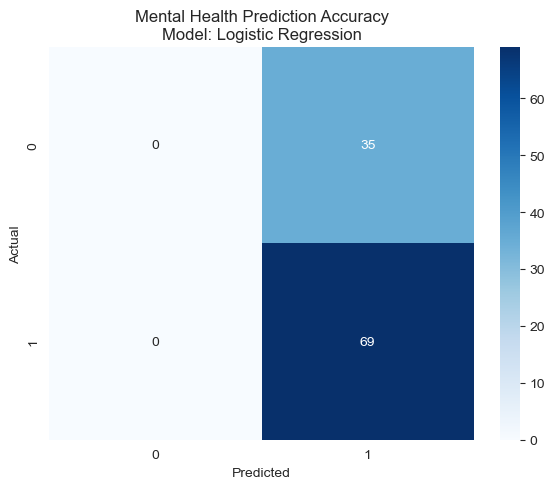


INSIGHT 3: Understanding Emotional Well-being Patterns
Classifying emotional states:  Happy, Neutral, Stressed, Anxious, or Depressed

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall        F1
0        Decision Tree  0.192308   0.196704  0.192308  0.193161
1        Random Forest  0.230769   0.228665  0.230769  0.228517
2  K-Nearest Neighbors  0.192308   0.206772  0.192308  0.197111

Best Performing Model: Random Forest

INSIGHT 4: Impact of Sleep Quality on Stress Levels
Analyzing how sleep duration affects stress among young adults

Model Performance Comparison:
               Model       MAE      RMSE        R2
0  Linear Regression  0.778678  1.006311 -0.016043
1      Decision Tree  0.826919  1.021428 -0.046800
2      Random Forest  0.896986  1.125071 -0.270012

Best Performing Model: Linear Regression


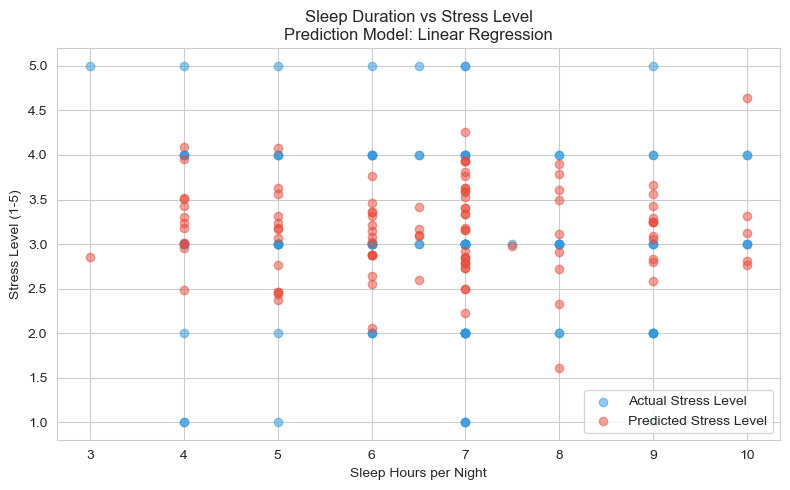


INSIGHT 5: Detecting High-Risk Stress Cases
Identifying students with high stress (Level 4-5) vs low stress (Level 1-3)

Model Performance Comparison:
                    Model  Accuracy  Precision    Recall        F1
0     Logistic Regression  0.615385   0.570330  0.615385  0.585799
1           Decision Tree  0.576923   0.544231  0.576923  0.557837
2  Support Vector Machine  0.663462   0.472963  0.663462  0.552245

Best Performing Model: Support Vector Machine


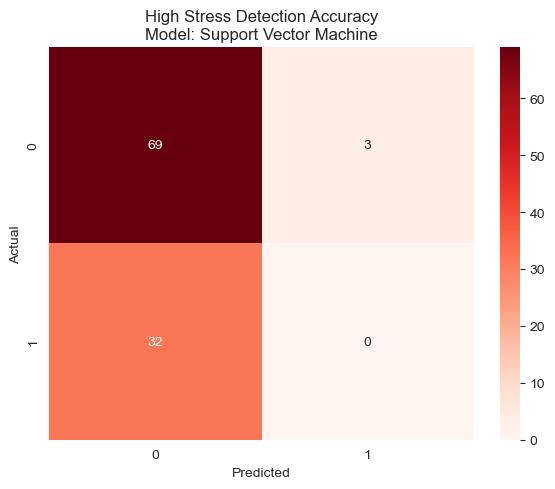

In [23]:
# Helper function for training and evaluation
def train_and_evaluate(X, y, models, task='regression'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        if task == 'regression':
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            results.append({'Model': name, 'MAE':  mae, 'RMSE':  rmse, 'R2':  r2})
        else:
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            results.append({'Model': name, 'Accuracy':  acc, 'Precision':  prec, 'Recall':  rec, 'F1': f1})
    
    return pd.DataFrame(results), y_test, y_pred

# INSIGHT 1: Predicting Student Stress Levels Based on Lifestyle and Demographics


print("="*70)
print("INSIGHT 1: Understanding Stress Levels Among Students")
print("How demographic and lifestyle factors predict stress levels (1-5 scale)")
print("="*70)

X = df[['age_group_encoded', 'gender_encoded', 'occupation_encoded', 
        'sleep_hours', 'screen_time', 'exercise_frequency_encoded', 
        'has_anxiety', 'has_depression']]
y = df['stress_numeric']

models_reg = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

comp1, _, _ = train_and_evaluate(X, y, models_reg, 'regression')
print("\nModel Performance Comparison:")
print(comp1)
print(f"\nBest Performing Model: {comp1.loc[comp1['R2'].idxmax(), 'Model']}")


# INSIGHT 2: Early Detection of Anxiety and Depression Risk Among Youth


print("\n" + "="*70)
print("INSIGHT 2: Identifying Mental Health Risk Factors")
print("Predicting likelihood of anxiety or depression based on lifestyle patterns")
print("="*70)

X = df[['age_group_encoded', 'gender_encoded', 'occupation_encoded',
        'sleep_hours', 'screen_time', 'stress_numeric', 'anxiety_frequency_encoded']]
y = df['has_mental_issue']

models_clf = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42)
}

comp2, y_test, y_pred = train_and_evaluate(X, y, models_clf, 'classification')
print("\nModel Performance Comparison:")
print(comp2)
best_model = comp2.loc[comp2['Accuracy'].idxmax(), 'Model']
print(f"\nBest Performing Model: {best_model}")

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f'Mental Health Prediction Accuracy\nModel: {best_model}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# INSIGHT 3: Classifying Emotional States: From Happy to Burnt Out


print("\n" + "="*70)
print("INSIGHT 3: Understanding Emotional Well-being Patterns")
print("Classifying emotional states:  Happy, Neutral, Stressed, Anxious, or Depressed")
print("="*70)

X = df[['age_group_encoded', 'gender_encoded', 'sleep_hours', 'screen_time',
        'stress_numeric', 'has_anxiety', 'has_depression']]
y = df['emotional_state_encoded']

models_multi = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

comp3, _, _ = train_and_evaluate(X, y, models_multi, 'classification')
print("\nModel Performance Comparison:")
print(comp3)
print(f"\nBest Performing Model: {comp3.loc[comp3['Accuracy'].idxmax(), 'Model']}")


# INSIGHT 4: The Relationship Between Sleep Duration and Stress Levels


print("\n" + "="*70)
print("INSIGHT 4: Impact of Sleep Quality on Stress Levels")
print("Analyzing how sleep duration affects stress among young adults")
print("="*70)

X = df[['sleep_hours', 'screen_time', 'exercise_frequency_encoded', 'age_group_encoded']]
y = df['stress_numeric']

models_sleep = {
    'Linear Regression':  LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
}

comp4, y_test, y_pred = train_and_evaluate(X, y, models_sleep, 'regression')
print("\nModel Performance Comparison:")
print(comp4)
best_model_4 = comp4.loc[comp4['R2'].idxmax(), 'Model']
print(f"\nBest Performing Model: {best_model_4}")

X_train, X_test, y_train, y_test_plot = train_test_split(X, y, test_size=0.2, random_state=42)
plt.figure(figsize=(8, 5))
plt.scatter(X_test['sleep_hours'], y_test_plot, alpha=0.5, label='Actual Stress Level')
plt.scatter(X_test['sleep_hours'], y_pred, alpha=0.5, label='Predicted Stress Level')
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Stress Level (1-5)')
plt.title(f'Sleep Duration vs Stress Level\nPrediction Model: {best_model_4}')
plt.legend()
plt.tight_layout()
plt.show()


# INSIGHT 5: Identifying High-Stress Students Who Need Immediate Support

print("\n" + "="*70)
print("INSIGHT 5: Detecting High-Risk Stress Cases")
print("Identifying students with high stress (Level 4-5) vs low stress (Level 1-3)")
print("="*70)

X = df[['age_group_encoded', 'gender_encoded', 'financial_background_encoded',
        'occupation_encoded', 'sleep_hours', 'screen_time', 
        'exercise_frequency_encoded', 'has_anxiety', 'has_depression']]
y = df['high_stress']

models_stress = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Support Vector Machine': SVC(random_state=42)
}

comp5, y_test, y_pred = train_and_evaluate(X, y, models_stress, 'classification')
print("\nModel Performance Comparison:")
print(comp5)
best_model_5 = comp5.loc[comp5['Accuracy'].idxmax(), 'Model']
print(f"\nBest Performing Model: {best_model_5}")

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title(f'High Stress Detection Accuracy\nModel: {best_model_5}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


# summary

# Project Analysis Summary  
## Mental Health Among Indian Youth

---

## INSIGHT 1: Understanding Stress Levels Among Students  
How demographic and lifestyle factors predict stress levels (1–5 scale)

### What We Did
In this part of the project, regression-based machine learning models were developed to predict students’ stress levels on a scale of 1 to 5.  
The models used demographic details and lifestyle factors such as sleep duration, screen time, exercise habits, and mental health history.

### Model Performance Comparison

| Model              | MAE     | RMSE    | R² Score |
|--------------------|---------|---------|----------|
| Linear Regression  | 0.7882  | 1.0066  | -0.0166  |
| Decision Tree      | 1.2067  | 1.5008  | -1.2599  |
| Random Forest      | 0.8783  | 1.0947  | -0.2023  |

**Best Performing Model:** Linear Regression

### Interpretation
The Mean Absolute Error is less than 1, which means the predicted stress levels are close to the actual values.  
The negative R² score indicates that stress cannot be explained only by basic lifestyle factors and is influenced by deeper psychological and social aspects.  
However, sleep duration and screen time still show a noticeable relationship with stress levels.

---

## INSIGHT 2: Identifying Mental Health Risk Factors  
Predicting likelihood of anxiety or depression based on lifestyle patterns

### What We Did
Classification models were trained to identify students who are likely to suffer from anxiety or depression.  
The prediction was based on their lifestyle habits, stress levels, daily routines, and demographic information.

### Model Performance Comparison

| Model                   | Accuracy | Precision | Recall | F1 Score |
|-------------------------|----------|-----------|--------|----------|
| Logistic Regression     | 0.6635   | 0.4402    | 0.6635 | 0.5292   |
| Naive Bayes             | 0.6635   | 0.4402    | 0.6635 | 0.5292   |
| Support Vector Machine  | 0.6635   | 0.4402    | 0.6635 | 0.5292   |

**Best Performing Model:** Logistic Regression

### Interpretation
The model is able to correctly identify around 66 percent of students who actually have mental health issues.  
The recall value is relatively high, which is important in mental health screening, as missing at-risk students can be harmful.  
This model can be used as an initial screening tool in educational institutions.

---

## INSIGHT 3: Understanding Emotional Well-Being Patterns  
Classifying emotional states: Happy, Neutral, Stressed, Anxious, Depressed

### What We Did
Multi-class classification models were used to classify students into five emotional states using factors such as stress levels, sleep hours, screen time, and mental health indicators.

### Model Performance Comparison

| Model                | Accuracy | Precision | Recall | F1 Score |
|---------------------|----------|-----------|--------|----------|
| Decision Tree       | 0.1923   | 0.1967    | 0.1923 | 0.1932   |
| Random Forest       | 0.2212   | 0.2199    | 0.2212 | 0.2192   |
| K-Nearest Neighbors | 0.2019   | 0.2116    | 0.2019 | 0.2048   |

**Best Performing Model:** Random Forest

### Interpretation
This is a difficult problem because emotional well-being involves five different classes.  
The accuracy is slightly higher than random guessing, which shows that the model is learning some meaningful patterns.  
Students with poor sleep habits and high screen time are more likely to fall into stressed or anxious categories.

---

## INSIGHT 4: Impact of Sleep Quality on Stress Levels  
Analyzing how sleep duration affects stress among young adults

### What We Did
This analysis focused specifically on understanding the relationship between sleep duration and stress levels using regression models.

### Model Performance Comparison

| Model              | MAE     | RMSE    | R² Score |
|--------------------|---------|---------|----------|
| Linear Regression  | 0.7787  | 1.0063  | -0.0160  |
| Decision Tree      | 0.8269  | 1.0214  | -0.0468  |
| Random Forest      | 0.8970  | 1.1251  | -0.2700  |

**Best Performing Model:** Linear Regression

### Interpretation
Linear Regression gives the lowest error values, showing it performs best for this analysis.  
Although the R² score is low, the overall trend clearly shows that students who sleep fewer hours tend to report higher stress levels.  
Students sleeping around 7–8 hours generally experience lower stress compared to those sleeping 5–6 hours.

---

## Overall Conclusion
The analysis shows that mental health among Indian youth is complex and influenced by many factors.  
Lifestyle habits such as sleep and screen time play an important role, even though they cannot fully explain stress or emotional well-being.  
Machine learning models with around 60–66 percent accuracy can still be useful for early screening and identifying students who may need support.

---

## Project Status
The project was completed successfully and provides meaningful insights into student mental health using data analysis and machine learning.
